In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
final_df=pd.read_csv("finalfile.txt", sep="\t")

In [3]:
final_df

,strain,A1C,A1G,A1T,T2G,T2K,T2A,T2C,T3C,T3A,...,A29891G,A29892G,Gender,Patient age,clade,Nextclade_pango,region,country,category,Collection date
0,hCoV-19/Turkey/TSIM_Ankara_140111_978/2024,0,0,0,0,0,0,0,0,0,...,0,0,Male,87.00,19A,B,Europe,Turkey,Severe,12-01-2024
1,hCoV-19/Slovakia/ruvzbb_24_02_00000120/2024,0,0,0,1,0,0,0,1,0,...,1,1,Female,91.00,recombinant,XCU,Europe,Slovakia,Severe,03-01-2024
2,hCoV-19/Brazil/RJ-FIOCRUZ-51/2024,0,0,0,1,0,0,0,1,0,...,1,1,Male,35.00,21K,BA.1,South America,Brazil,Severe,06-01-2024
3,hCoV-19/Fujian/FCDC-FZ9970725/2024,0,0,0,1,0,0,0,1,0,...,1,1,Male,70.00,23F,EG.5.1.1,Asia,China,Severe,30-01-2024
4,hCoV-19/Fujian/FCDC-XM010309HG/2024,0,0,0,1,0,0,0,1,0,...,1,1,Female,19.00,23H,HK.3,Asia,China,Severe,01-01-2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13968,hCoV-19/Spain/CT-LabRefCat-9317885r/2024,0,0,0,1,0,0,0,1,0,...,1,1,Male,94.00,24A,JN.1.4.9,Europe,Spain,Severe,03-05-2024
13969,hCoV-19/Spain/CT-LabRefCat-6385185r/2024,0,0,0,1,0,0,0,1,0,...,1,1,Female,81.00,24E,KP.3.1.1,Europe,Spain,Severe,11-10-2024
13970,hCoV-19/USA/NY-WMC-6178/2024,0,0,0,1,0,0,0,1,0,...,1,1,Male,0.42,24A,JN.1.4,North America,USA,Severe,01-03-2024
13971,hCoV-19/Mexico/GUA_CIAD_01001002/2024,0,0,0,1,0,0,0,1,0,...,1,1,Female,26.00,23B,XBB.1.16.15,North America,Mexico,Severe,08-02-2024


In [4]:
final_df["Collection date"] = pd.to_datetime(final_df["Collection date"],  format="mixed", 
    dayfirst=True)


In [5]:
print(final_df["Collection date"].dtypes)
print(final_df["Collection date"].head())

datetime64[ns]
0   2024-01-12
1   2024-01-03
2   2024-01-06
3   2024-01-30
4   2024-01-01
Name: Collection date, dtype: datetime64[ns]


In [6]:
final_df["month"] = final_df["Collection date"].dt.to_period("M").astype(str)


In [7]:
bins   = [-np.inf, 20, 40, 60, 80, np.inf]  # (-inf,20], (20,40], (40,60], (60,80], (80,inf)
labels = ["0-20", "21-40", "41-60", "61-80", "80+"]

final_df["age_band"] = pd.cut(final_df["Patient age"], bins=bins, labels=labels)

print(final_df[["Patient age", "age_band"]].head(15))

    Patient age age_band
0          87.0      80+
1          91.0      80+
2          35.0    21-40
3          70.0    61-80
4          19.0     0-20
5          60.0    41-60
6          87.0      80+
7          76.0    61-80
8          69.0    61-80
9          46.0    41-60
10         79.0    61-80
11         62.0    61-80
12         24.0    21-40
13         27.0    21-40
14         33.0    21-40


In [8]:
final_df['category'] = pd.get_dummies(final_df['category'])['Severe'].astype(int)
print(final_df['category'].head())

0    1
1    1
2    1
3    1
4    1
Name: category, dtype: int32


In [9]:
final_df['Gender'] = pd.get_dummies(final_df['Gender'])['Female'].astype(int)
print(final_df['Gender'].head())

0    0
1    1
2    0
3    0
4    1
Name: Gender, dtype: int32


In [10]:
clade_dummies = pd.get_dummies(final_df['clade'], prefix='clade').astype(int)
final_df = pd.concat([final_df, clade_dummies], axis=1)

In [11]:
final_df = final_df.drop(['clade', 'clade_24C'], axis = 1)

In [12]:
Nextclade_dummies = pd.get_dummies(final_df['Nextclade_pango'], prefix='Nextclade_pango').astype(int)
final_df = pd.concat([final_df, Nextclade_dummies], axis=1)

In [13]:
final_df = final_df.drop(['Nextclade_pango', 'Nextclade_pango_XEN'], axis = 1)

In [14]:

import numpy as np
import pandas as pd

for col in ['country', 'month', 'age_band']:
    if col not in final_df.columns:
        raise KeyError(f"final_df must contain '{col}' for IPI weighting.")

final_df['__stratum__'] = (
    final_df['country'].astype(str) + '_' +
    final_df['month'].astype(str)   + '_' +
    final_df['age_band'].astype(str)
)

_counts = final_df['__stratum__'].value_counts(dropna=False)
_probs  = _counts / _counts.sum()
final_df['ipi_weight'] = final_df['__stratum__'].map(lambda s: 1.0 / _probs[s])

final_df['ipi_weight'] = final_df['ipi_weight'] / final_df['ipi_weight'].mean()

print("IPI weights computed. Summary:")
display(final_df['ipi_weight'].describe())


IPI weights computed. Summary:


count    13973.000000
mean         1.000000
std          2.756098
min          0.055730
25%          0.127972
50%          0.246803
75%          0.575874
max         20.731454
Name: ipi_weight, dtype: float64

In [15]:
X = final_df.drop(columns=['category', 'strain', 'country', 'region',
    'Collection date', 'month', 'age_band', '__stratum__', 'ipi_weight'])

In [16]:
y = final_df['category']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: category, dtype: int32

In [17]:
weights = final_df['ipi_weight'].values

In [18]:
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, weights, test_size=0.2, random_state=42
)

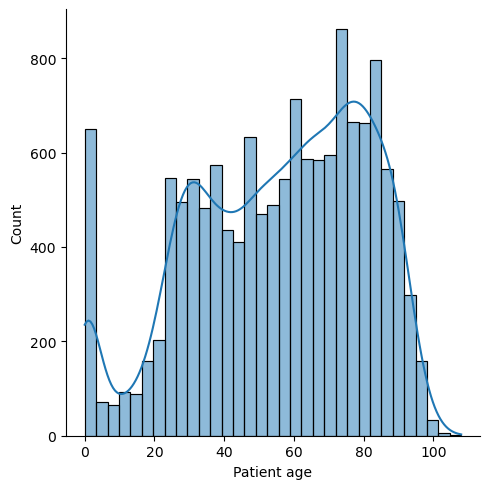

In [19]:
sns.displot(X["Patient age"], kde=True)
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[["Patient age"]] = scaler.fit_transform(X_train[["Patient age"]]) 
X_test[["Patient age"]] = scaler.transform(X_test[["Patient age"]]) 

In [21]:
import lightgbm as lgb
from scipy.stats import randint, uniform

In [22]:
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(500, 2100),               
    'max_depth': randint(10, 41),                     
    'learning_rate': uniform(0.001, 0.099),           
    'num_leaves': randint(10, 51),
}


In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score

In [24]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(accuracy_score)

In [25]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV


In [26]:
def expected_calibration_error(y_true, y_prob, n_bins=10, sample_weight=None):
    bins = np.linspace(0.0, 1.0, n_bins + 1)
    ece = 0.0
    if sample_weight is None:
        sample_weight = np.ones_like(y_true, dtype=float)

    for i in range(n_bins):
        bin_mask = (y_prob >= bins[i]) & (y_prob < bins[i + 1])
        bin_size = np.sum(sample_weight[bin_mask])
        if bin_size > 0:
            bin_acc = np.average(y_true[bin_mask], weights=sample_weight[bin_mask])
            bin_conf = np.average(y_prob[bin_mask], weights=sample_weight[bin_mask])
            ece += (bin_size / np.sum(sample_weight)) * abs(bin_acc - bin_conf)
    return ece


In [27]:
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    brier_score_loss
)

model = LGBMClassifier()
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,
    scoring=scorer,
    cv=cv,               
    verbose=2,
    n_jobs=2,
    random_state=42
)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]    

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6806, number of negative: 4372
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.254950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12758
[LightGBM] [Info] Number of data points in the train set: 11178, number of used features: 6318
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.608875 -> initscore=0.442584
[LightGBM] [Info] Start training from score 0.442584
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [28]:
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    brier_score_loss
)
cv_rows = []

cv_rows.append({
    "Fold": 1,
    "Setting": "Unweighted",
    "AUROC": roc_auc_score(y_test, y_prob),
    "AUPRC": average_precision_score(y_test, y_prob),
    "Brier": brier_score_loss(y_test, y_prob),
    "ECE@10": expected_calibration_error(y_test, y_prob, n_bins=10),
})

cv_rows.append({
    "Fold": 1,
    "Setting": "Weighted",
    "AUROC": roc_auc_score(y_test, y_prob, sample_weight=w_test),
    "AUPRC": average_precision_score(y_test, y_prob, sample_weight=w_test),
    "Brier": brier_score_loss(y_test, y_prob, sample_weight=w_test),
    "ECE@10": expected_calibration_error(y_test, y_prob, n_bins=10, sample_weight=w_test),
})

cv_results = pd.DataFrame(cv_rows)
summary = cv_results.groupby("Setting").agg(["mean", "std"]).round(4)

print("Per-fold results:\n", cv_results)
print("\nSummary (mean ± std across folds):\n", summary)

Per-fold results:
    Fold     Setting     AUROC     AUPRC     Brier    ECE@10
0     1  Unweighted  0.895157  0.944279  0.125985  0.025207
1     1    Weighted  0.949142  0.991101  0.071004  0.058887

Summary (mean ± std across folds):
            Fold       AUROC       AUPRC      Brier      ECE@10    
           mean std    mean std    mean std   mean std    mean std
Setting                                                           
Unweighted  1.0 NaN  0.8952 NaN  0.9443 NaN  0.126 NaN  0.0252 NaN
Weighted    1.0 NaN  0.9491 NaN  0.9911 NaN  0.071 NaN  0.0589 NaN


In [30]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print(confusion_matrix(y_test, y_pred, sample_weight=w_test))
print(classification_report(y_test, y_pred, sample_weight=w_test))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob, sample_weight=w_test))

[[ 316.35793781   81.38353918]
 [ 233.05590271 2004.4794739 ]]
              precision    recall  f1-score   support

           0       0.58      0.80      0.67 397.741476985662
           1       0.96      0.90      0.93 2237.5353766123862

    accuracy                           0.88 2635.276853598048
   macro avg       0.77      0.85      0.80 2635.276853598048
weighted avg       0.90      0.88      0.89 2635.276853598048

Test ROC AUC: 0.9491419145184329


fpr = [0.         0.         0.         ... 0.99737476 0.99937949 1.        ]
tpr = [0.00000000e+00 6.13596544e-05 9.65889617e-05 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
thresholds = [       inf 0.9997256  0.99970813 ... 0.06470403 0.05759495 0.04336906]
AUC = 0.949


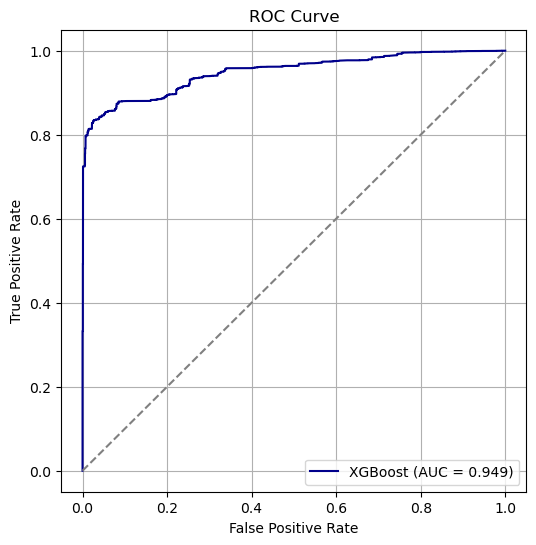

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob, sample_weight=w_test)
auc_score = roc_auc_score(y_test, y_prob, sample_weight=w_test)
print('fpr =', fpr)
print('tpr =', tpr)
print('thresholds =', thresholds)
print(f"AUC = {auc_score:.3f}")
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc_score:.3f})", color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve_xgboost.tiff', dpi=600, format='tiff')
plt.show()

In [32]:
np.set_printoptions(threshold=np.inf)  # ensures full array print
print("False Positive Rate (FPR):\n", fpr)
print("True Positive Rate (TPR):\n", tpr)
print("Thresholds:\n", thresholds)
print(f"AUC = {auc_score:.3f}")

with open("roc_valueslightgbmwithoutcountryregionweighted.txt", "w") as f:
    f.write("False Positive Rate (FPR):\n")
    np.savetxt(f, fpr, fmt="%.10f")
    
    f.write("\nTrue Positive Rate (TPR):\n")
    np.savetxt(f, tpr, fmt="%.10f")
    
    f.write("\nThresholds:\n")
    np.savetxt(f, thresholds, fmt="%.10f")
    
    f.write(f"\nAUC = {auc_score:.3f}\n")

False Positive Rate (FPR):
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e

100%|===================| 2788/2795 [05:46<00:00]        

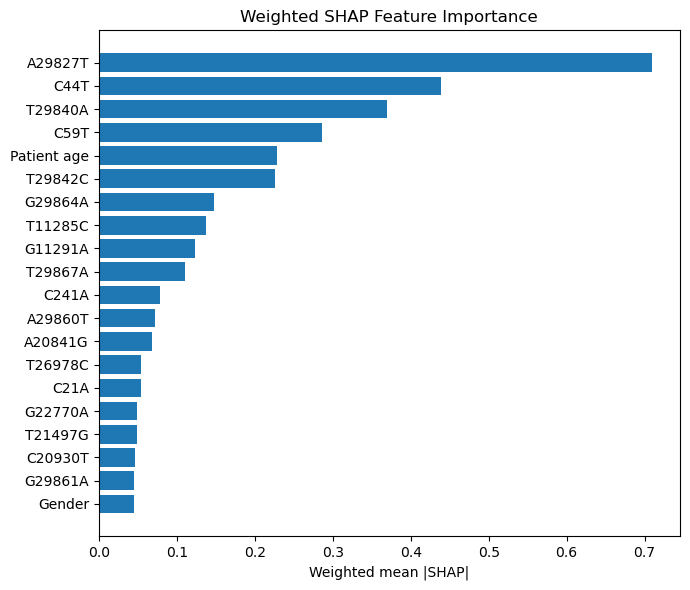

In [33]:
import numpy as np
import shap
import matplotlib.pyplot as plt

explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)           

w = np.asarray(w_test, dtype=float).ravel()
w = w / w.sum()

vals = np.abs(shap_values.values)        
weighted_importance = (vals * w[:, None]).sum(axis=0)   

feature_names = np.array(X_test.columns)
order = np.argsort(weighted_importance)[::-1]
topk = 20                                  
order = order[:topk]

plt.figure(figsize=(7, 6))
plt.barh(feature_names[order][::-1], weighted_importance[order][::-1])
plt.xlabel("Weighted mean |SHAP|")
plt.title("Weighted SHAP Feature Importance")
plt.tight_layout()
plt.show()